In [1]:
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Lab4')
os.listdir()

Mounted at /content/drive


['supplemental_train.csv',
 'train.csv',
 'example_sample_submission.csv',
 'example_test.csv',
 'asset_details.csv',
 'notebook98543790ec.ipynb',
 'ans.csv',
 'visualization.ipynb',
 'Lab4.ipynb',
 'bi-lstm-lstm-grus-multi-step-forecasting.ipynb',
 'gridsearcg.ipynb',
 'Autoencoder.ipynb']

In [2]:
import pandas as pd
import numpy as np

In [3]:
# !gdown --id 1EMC68T0UBWcfBHXrJS1X-aOtS86VWrZ3

In [4]:
df_train = pd.read_csv("train.csv")
df_train['date'] = pd.to_datetime(df_train['timestamp'],unit='s')
df_train.head(5)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00


In [5]:
data_groups = df_train.groupby("Asset_ID")

In [6]:
df0 = data_groups.get_group(0).set_index('date').drop(columns = ['timestamp','Asset_ID'])

In [7]:
VMAX = np.max(df0[np.isfinite(df0.VWAP)].VWAP)
VMIN = np.min(df0[np.isfinite(df0.VWAP)].VWAP)
tmp_V = np.nan_to_num(df0.VWAP, posinf=VMAX, neginf=VMIN)
del df0['VWAP']
df0['VWAP'] = tmp_V

In [8]:
df0

,Count,Open,High,Low,Close,Volume,Target,VWAP
date,,,,,,,,
2018-01-01 00:01:00,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,-0.014399,8.530000
2018-01-01 00:02:00,7.0,8.5300,8.5300,8.5145,8.5145,71.390000,-0.015875,8.520215
2018-01-01 00:03:00,45.0,8.5065,8.5299,8.4848,8.4848,1546.820000,-0.015410,8.501394
2018-01-01 00:04:00,14.0,8.5009,8.5066,8.4744,8.5009,125.800000,-0.012524,8.479810
2018-01-01 00:05:00,5.0,8.5007,8.5007,8.4560,8.4560,125.010000,-0.005940,8.458435
...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,277.0,364.1115,364.2000,362.7000,362.9180,773.176000,NaN,363.458767
2021-09-20 23:57:00,296.0,362.9265,363.2000,362.1000,362.2000,596.347783,NaN,362.655647
2021-09-20 23:58:00,319.0,362.2310,362.4000,361.7000,361.8580,820.909736,NaN,361.962990


In [9]:
date_df = pd.date_range(start='1/1/2018 00:01:00',end='9/21/2021 00:00:00',freq='min')

In [10]:
(1632182400-1514764860)/60

1956959.0

In [11]:
tmp = df0.reindex(date_df)

In [12]:
tmp

,Count,Open,High,Low,Close,Volume,Target,VWAP
2018-01-01 00:01:00,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,-0.014399,8.530000
2018-01-01 00:02:00,7.0,8.5300,8.5300,8.5145,8.5145,71.390000,-0.015875,8.520215
2018-01-01 00:03:00,45.0,8.5065,8.5299,8.4848,8.4848,1546.820000,-0.015410,8.501394
2018-01-01 00:04:00,14.0,8.5009,8.5066,8.4744,8.5009,125.800000,-0.012524,8.479810
2018-01-01 00:05:00,5.0,8.5007,8.5007,8.4560,8.4560,125.010000,-0.005940,8.458435
...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,277.0,364.1115,364.2000,362.7000,362.9180,773.176000,NaN,363.458767
2021-09-20 23:57:00,296.0,362.9265,363.2000,362.1000,362.2000,596.347783,NaN,362.655647
2021-09-20 23:58:00,319.0,362.2310,362.4000,361.7000,361.8580,820.909736,NaN,361.962990
2021-09-20 23:59:00,588.0,362.0120,364.3000,361.8000,364.1145,1268.055170,NaN,363.465603


In [13]:
droptmp = tmp

In [14]:
droptmp.dropna(subset=["Target"],inplace=True)

In [15]:
droptmp

,Count,Open,High,Low,Close,Volume,Target,VWAP
2018-01-01 00:01:00,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,-0.014399,8.530000
2018-01-01 00:02:00,7.0,8.5300,8.5300,8.5145,8.5145,71.390000,-0.015875,8.520215
2018-01-01 00:03:00,45.0,8.5065,8.5299,8.4848,8.4848,1546.820000,-0.015410,8.501394
2018-01-01 00:04:00,14.0,8.5009,8.5066,8.4744,8.5009,125.800000,-0.012524,8.479810
2018-01-01 00:05:00,5.0,8.5007,8.5007,8.4560,8.4560,125.010000,-0.005940,8.458435
...,...,...,...,...,...,...,...,...
2021-09-20 23:40:00,367.0,360.0870,361.3000,359.8000,361.1670,702.415691,0.002325,360.397914
2021-09-20 23:41:00,461.0,361.0880,362.5030,361.0000,362.0760,1092.706548,0.000995,361.797807
2021-09-20 23:42:00,472.0,361.9850,362.5000,361.2000,361.8400,1208.788771,0.001499,361.817514
2021-09-20 23:43:00,325.0,361.8515,362.3000,361.1940,361.3165,557.300860,0.010607,361.727016


In [16]:
droptmp.shape

(1929204, 8)

In [17]:
ttttmp = droptmp[-10000:]
ttttmp = ttttmp.fillna(method="ffill")

In [18]:
ttttmp

,Count,Open,High,Low,Close,Volume,Target,VWAP
2021-09-14 00:44:00,197.0,399.3780,399.600,398.600,398.6185,328.868400,-0.002068,399.016438
2021-09-14 00:45:00,229.0,398.5425,399.600,398.500,399.4700,639.145004,-0.001659,398.886757
2021-09-14 00:46:00,214.0,399.3690,399.500,398.700,399.3385,419.402526,-0.001875,399.134084
2021-09-14 00:47:00,159.0,399.1155,399.800,398.931,399.7465,192.681858,-0.003005,399.347750
2021-09-14 00:48:00,161.0,399.6790,400.000,399.500,399.8800,440.391498,-0.003331,399.697339
...,...,...,...,...,...,...,...,...
2021-09-20 23:40:00,367.0,360.0870,361.300,359.800,361.1670,702.415691,0.002325,360.397914
2021-09-20 23:41:00,461.0,361.0880,362.503,361.000,362.0760,1092.706548,0.000995,361.797807
2021-09-20 23:42:00,472.0,361.9850,362.500,361.200,361.8400,1208.788771,0.001499,361.817514
2021-09-20 23:43:00,325.0,361.8515,362.300,361.194,361.3165,557.300860,0.010607,361.727016


In [19]:
ttttmp.isnull().sum()

Count     0
Open      0
High      0
Low       0
Close     0
Volume    0
Target    0
VWAP      0
dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn.preprocessing

sc = StandardScaler()

ttttmp = sc.fit_transform(ttttmp)

In [21]:
ttttmp

array([[-0.46867679, -0.69864604, -0.70723264, ..., -0.46935768,
        -0.65248321, -0.72030439],
       [-0.35245102, -0.75105378, -0.70723264, ..., -0.13164503,
        -0.5148515 , -0.72843539],
       [-0.40693185, -0.69921057, -0.71353142, ..., -0.37081812,
        -0.5875262 , -0.71292799],
       ...,
       [ 0.53013843, -3.04416694, -3.04408021, ...,  0.48836921,
         0.54585551, -3.05267231],
       [-0.00377371, -3.05254089, -3.05667777, ..., -0.2207262 ,
         3.60558326, -3.05834657],
       [-0.11273537, -3.08079904, -3.10076923, ..., -0.13017582,
         2.89564254, -3.11793034]])

In [22]:
def buildTrainData(train_df,pDays=60,fDays=16):
    x_train = []
    y_train = []

    for i in range(len(train_df)-pDays-fDays):
        x_train.append(np.array(train_df[i:i+pDays]))
        y_train.append(np.array(train_df[i+pDays:i+pDays+fDays][0,-2]))
    return np.array(x_train), np.array(y_train)

def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]

In [23]:
X, Y = buildTrainData(ttttmp,128,1)
X, Y = shuffle(X,Y)

In [24]:
X[:1]

array([[[-0.34518691,  0.76522672,  0.76038322, ..., -0.51731866,
         -0.44278382,  0.74984293],
        [-0.37787541,  0.74208075,  0.74148688, ..., -0.34938752,
         -0.85918393,  0.73745562],
        [-0.02193398,  0.73279727,  0.75408444, ...,  0.32469572,
         -0.38446429,  0.73061488],
        ...,
        [-0.26891375,  0.71608074,  0.72259054, ..., -0.18652979,
         -0.19851595,  0.72337914],
        [-0.4759409 ,  0.71899751,  0.70999298, ..., -0.47049278,
         -0.00937886,  0.71815211],
        [-0.26164964,  0.72370197,  0.70999298, ..., -0.33395365,
          0.14393756,  0.70908069]]])

In [25]:
X.shape

(9871, 128, 8)

In [26]:
Y.shape

(9871,)

In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.layers import Dense, GRU
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, LayerNormalization

In [28]:
from tensorflow import keras

In [ ]:
# Create LSTM or GRU model
def create_model(units):
    model = Sequential()
    model.add(LSTM(units = units, return_sequences = True,input_shape = [X.shape[1], X.shape[2]]))
    model.add(Dropout(0.2))
    # model.add(LayerNormalization())
    model.add(LSTM(units = units, return_sequences = False))
    model.add(Dropout(0.2))
    # model.add(LayerNormalization())
    model.add(Dense(units = 1, activation='relu'))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [ ]:
model = create_model(128)
model.summary()
history = model.fit(X, Y, epochs=50, batch_size=128, validation_split=0.2, shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128, 128)          70144     
                                                                 
 dropout_3 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 201,857
Trainable params: 201,857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
62/62 [==============================]

In [ ]:
predict_data = model.predict(X[0:10].reshape(-1,128,8))

In [ ]:
Y[0:10]

array([ 0.13119212, -0.06305825, -0.28960321,  0.10544067,  0.28025499,
        1.00216936, -0.84595618,  0.51026396, -0.00883262, -0.37527856])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

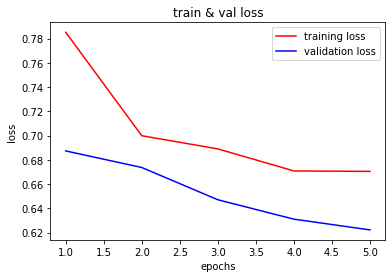

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'r',label='training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('train & val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# TEST

LSTM_Autoencoder:
https://towardsdatascience.com/step-by-step-understanding-lstm-autoencoder-layers-ffab055b6352

Sequence-to-sequence autoencoder:
https://blog.keras.io/building-autoencoders-in-keras.html

In [29]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

In [30]:
timesteps = 128  # Length of your sequences
input_dim = 8 
latent_dim = 16 

In [41]:
inputs = Input(shape=(timesteps, input_dim))
encoded = Dropout(0.2)(inputs)
top_1 = LSTM(6, return_sequences=True)(encoded)
top_2 = LSTM(4)(top_1)

repeat = RepeatVector(timesteps)(top_2)
bot_1 = LSTM(6, return_sequences=True)(repeat)
decoded = LSTM(input_dim, return_sequences=True)(bot_1)

sequence_autoencoder = Model(inputs, decoded)
# encoder = Model(inputs, encoded)

In [42]:
sequence_autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 8)]          0         
                                                                 
 dropout_6 (Dropout)         (None, 128, 8)            0         
                                                                 
 lstm_18 (LSTM)              (None, 128, 6)            360       
                                                                 
 lstm_19 (LSTM)              (None, 4)                 176       
                                                                 
 repeat_vector_4 (RepeatVect  (None, 128, 4)           0         
 or)                                                             
                                                                 
 lstm_20 (LSTM)              (None, 128, 6)            264       
                                                           

In [43]:
sequence_autoencoder.compile(optimizer='adam', loss='mse')
sequence_autoencoder.summary()
history_auto = sequence_autoencoder.fit(X, X, epochs=10, batch_size=16, validation_split=0.2, shuffle=True)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 8)]          0         
                                                                 
 dropout_6 (Dropout)         (None, 128, 8)            0         
                                                                 
 lstm_18 (LSTM)              (None, 128, 6)            360       
                                                                 
 lstm_19 (LSTM)              (None, 4)                 176       
                                                                 
 repeat_vector_4 (RepeatVect  (None, 128, 4)           0         
 or)                                                             
                                                                 
 lstm_20 (LSTM)              (None, 128, 6)            264       
                                                           

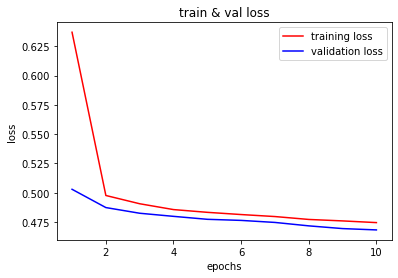

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history_auto.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'r',label='training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title('train & val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [47]:
X[0]

array([[-0.34518691,  0.76522672,  0.76038322, ..., -0.51731866,
        -0.44278382,  0.74984293],
       [-0.37787541,  0.74208075,  0.74148688, ..., -0.34938752,
        -0.85918393,  0.73745562],
       [-0.02193398,  0.73279727,  0.75408444, ...,  0.32469572,
        -0.38446429,  0.73061488],
       ...,
       [-0.26891375,  0.71608074,  0.72259054, ..., -0.18652979,
        -0.19851595,  0.72337914],
       [-0.4759409 ,  0.71899751,  0.70999298, ..., -0.47049278,
        -0.00937886,  0.71815211],
       [-0.26164964,  0.72370197,  0.70999298, ..., -0.33395365,
         0.14393756,  0.70908069]])

In [54]:
ans = sequence_autoencoder.predict(X[0].reshape(-1,128,8))

In [59]:
ans

array([[[ 0.05011938,  0.19395503,  0.18543898, ...,  0.01362367,
         -0.00154907,  0.17333595],
        [ 0.07371251,  0.46456128,  0.44148716, ...,  0.00171609,
          0.00600359,  0.43801233],
        [ 0.03983768,  0.6204414 ,  0.6027357 , ..., -0.03617111,
          0.02547918,  0.61276   ],
        ...,
        [-0.30181485,  0.6591466 ,  0.66276157, ..., -0.26457542,
          0.02580351,  0.6502213 ],
        [-0.30183873,  0.65914214,  0.66275984, ..., -0.264603  ,
          0.02579972,  0.65021497],
        [-0.30186146,  0.65913785,  0.6627582 , ..., -0.26462927,
          0.0257961 ,  0.6502088 ]]], dtype=float32)

In [50]:
X[0]

array([[-0.34518691,  0.76522672,  0.76038322, ..., -0.51731866,
        -0.44278382,  0.74984293],
       [-0.37787541,  0.74208075,  0.74148688, ..., -0.34938752,
        -0.85918393,  0.73745562],
       [-0.02193398,  0.73279727,  0.75408444, ...,  0.32469572,
        -0.38446429,  0.73061488],
       ...,
       [-0.26891375,  0.71608074,  0.72259054, ..., -0.18652979,
        -0.19851595,  0.72337914],
       [-0.4759409 ,  0.71899751,  0.70999298, ..., -0.47049278,
        -0.00937886,  0.71815211],
       [-0.26164964,  0.72370197,  0.70999298, ..., -0.33395365,
         0.14393756,  0.70908069]])

array([[[-0.34518691,  0.76522672,  0.76038322, ..., -0.51731866,
         -0.44278382,  0.74984293],
        [-0.37787541,  0.74208075,  0.74148688, ..., -0.34938752,
         -0.85918393,  0.73745562],
        [-0.02193398,  0.73279727,  0.75408444, ...,  0.32469572,
         -0.38446429,  0.73061488],
        ...,
        [-0.26891375,  0.71608074,  0.72259054, ..., -0.18652979,
         -0.19851595,  0.72337914],
        [-0.4759409 ,  0.71899751,  0.70999298, ..., -0.47049278,
         -0.00937886,  0.71815211],
        [-0.26164964,  0.72370197,  0.70999298, ..., -0.33395365,
          0.14393756,  0.70908069]],

       [[-0.33065869,  0.45526519,  0.43914542, ..., -0.57364345,
         -0.08614897,  0.44654841],
        [-0.43235624,  0.44400583,  0.43914542, ..., -0.54806486,
         -0.20110434,  0.44797004],
        [-0.37424335,  0.45071754,  0.43914542, ..., -0.36576746,
         -0.04464492,  0.45274048],
        ...,
        [-0.41056391,  0.42223984,  0.42213871, ..., -

In [ ]:
sc.inverse_transform(ans[0])

array([[ 2.5413988e+02,  4.0563971e+02,  4.0538718e+02, ...,
         7.2541827e+02, -7.5181597e-06,  4.0496658e+02],
       [ 2.1672208e+02,  4.0215921e+02,  4.0271042e+02, ...,
         6.4479578e+02,  5.4441902e-05,  4.0175986e+02],
       [ 2.0429668e+02,  4.0046985e+02,  4.0140259e+02, ...,
         5.7547876e+02,  5.6641453e-05,  4.0022122e+02],
       ...,
       [ 1.9299408e+02,  3.9877094e+02,  3.9954022e+02, ...,
         4.6497763e+02, -2.0371586e-04,  3.9862436e+02],
       [ 1.9299408e+02,  3.9877094e+02,  3.9954022e+02, ...,
         4.6497763e+02, -2.0371586e-04,  3.9862436e+02],
       [ 1.9299408e+02,  3.9877094e+02,  3.9954022e+02, ...,
         4.6497763e+02, -2.0371586e-04,  3.9862436e+02]], dtype=float32)

In [ ]:
ttttmp

,Count,Open,High,Low,Close,Volume,Target,VWAP
2021-09-14 00:44:00,197.0,399.3780,399.600,398.600,398.6185,328.868400,-0.002068,399.016438
2021-09-14 00:45:00,229.0,398.5425,399.600,398.500,399.4700,639.145004,-0.001659,398.886757
2021-09-14 00:46:00,214.0,399.3690,399.500,398.700,399.3385,419.402526,-0.001875,399.134084
2021-09-14 00:47:00,159.0,399.1155,399.800,398.931,399.7465,192.681858,-0.003005,399.347750
2021-09-14 00:48:00,161.0,399.6790,400.000,399.500,399.8800,440.391498,-0.003331,399.697339
...,...,...,...,...,...,...,...,...
2021-09-20 23:40:00,367.0,360.0870,361.300,359.800,361.1670,702.415691,0.002325,360.397914
2021-09-20 23:41:00,461.0,361.0880,362.503,361.000,362.0760,1092.706548,0.000995,361.797807
2021-09-20 23:42:00,472.0,361.9850,362.500,361.200,361.8400,1208.788771,0.001499,361.817514
2021-09-20 23:43:00,325.0,361.8515,362.300,361.194,361.3165,557.300860,0.010607,361.727016


# 大師的code

In [ ]:
# input_dim = 8

# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras import Model
# input_layer = Input(shape=(input_dim))

# encoder = Dense(input_dim)(input_layer)
# # 是不是要正規化?
# encoder = Dense(4, activation="relu")(encoder)

# decoder = Dense(4, activation='tanh')(encoder)
# decoder = Dense(input_dim, activation='relu')(decoder)

# autoencoder = Model(inputs=input_layer, outputs=decoder)

# autoencoder.compile(optimizer='adam', 
#           loss='mean_squared_error', 
#           metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

In [ ]:
input_dim = (1, 3, 8*3)
input_layer = Input(shape=(input_dim))
print(input_layer.shape)
tf.keras.layers.Conv1D(2, 8*2, input_shape=)

# 依天分資料


In [ ]:
df_period = tmp.to_period('D')

In [ ]:
df_day = df_period.groupby(df_period.index)

In [ ]:
list(df_day.groups.keys())[0]

In [ ]:
train_data = 0
test_data = 0
for i in df_day.groups:
    dtmp = df_day.get_group(i)
    if dtmp['Count'].isnull().sum()>0:
        test_data += 1
    else:
        train_data += 1

print("train:",train_data)
print("test:",test_data)

In [ ]:
dtmp